## Предвидете ја вредноста Close (BTC) земајќи ја во предвид вредноста на оваа колона во изминатите четири дена
Hint : внимавајте како ќе го поделите множеството на train и test бидејќи се работи податоци во временска серија

##Симнете го податочното множество

In [ ]:
!gdown 14YlgjT_M8kDrvDKEv864fs7ZyI1lMErO

Downloading...
From: https://drive.google.com/uc?id=14YlgjT_M8kDrvDKEv864fs7ZyI1lMErO
To: /content/crypto_data.csv
100% 90.0k/90.0k [00:00<00:00, 113MB/s]


##Направете претпроцесирање на податоците

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/crypto_data.csv')

In [ ]:
data

,Date,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
0,09-11-17,1.99077,7143.580078,1.00818,320.884003
1,10-11-17,1.79684,6618.140137,1.00601,299.252991
2,11-11-17,1.67047,6357.600098,1.00899,314.681000
3,12-11-17,1.51969,5950.069824,1.01247,307.907990
4,13-11-17,1.68662,6559.490234,1.00935,316.716003
...,...,...,...,...,...
1748,23-08-22,299.03000,21528.090000,1.00000,1662.770000
1749,24-08-22,296.45000,21395.020000,1.00000,1657.060000
1750,25-08-22,301.58000,21600.900000,1.00010,1696.460000
1751,26-08-22,279.60000,20260.020000,1.00000,1507.780000


In [ ]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#data['Date']= le.fit_transform(data['Date'])

In [ ]:
data.isnull().sum()

Date            0
Close (BNB)     0
Close (BTC)     0
Close (USDT)    0
Close (ETH)     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1753 non-null   object 
 1   Close (BNB)   1753 non-null   float64
 2   Close (BTC)   1753 non-null   float64
 3   Close (USDT)  1753 non-null   float64
 4   Close (ETH)   1753 non-null   float64
dtypes: float64(4), object(1)
memory usage: 68.6+ KB


In [ ]:
data['Close (BNB)'] = data['Close (BNB)'].astype(int)
data['Close (BTC)'] = data['Close (BTC)'].astype(int)
data['Close (USDT)'] = data['Close (USDT)'].astype(int)
data['Close (ETH)'] = data['Close (ETH)'].astype(int)

In [ ]:
data.sort_values(by='Date', inplace=True)

In [ ]:
data

,Date,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
53,01-01-18,8,13657,1,772
418,01-01-19,6,3843,1,140
783,01-01-20,13,7200,0,130
1149,01-01-21,37,29374,1,730
1514,01-01-22,527,47686,1,3769
...,...,...,...,...,...
52,31-12-17,8,14156,1,756
417,31-12-18,6,3742,1,133
782,31-12-19,13,7193,0,129
1148,31-12-20,37,29001,1,737


In [ ]:
last_date = data['Date'].max()
last_date

'31-12-21'

In [ ]:
import pandas as pd

# Assuming 'Date' is in string format 'DD-MM-YY'
data['Date'] = pd.to_datetime(data['Date'], format='%y-%m-%d')

# Get the last date in the dataset
last_date = data['Date'].max()

# Calculate the date 4 days ago from the last date
four_days_ago = last_date - pd.DateOffset(days=4)

# Filter the DataFrame based on the date condition
recent_dates = data[data['Date'].dt.date >= four_days_ago.date()]

# Create a new DataFrame with the filtered dates
new_dataframe = pd.DataFrame(recent_dates)

# Display the new DataFrame
print(new_dataframe)

           Date  Close (BNB)  Close (BTC)  Close (USDT)  Close (ETH)
52   2031-12-17            8        14156             1          756
417  2031-12-18            6         3742             1          133
782  2031-12-19           13         7193             0          129
1148 2031-12-20           37        29001             1          737
1513 2031-12-21          511        46306             1         3682


In [ ]:
new_dataframe

,Date,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
52,2031-12-17,8,14156,1,756
417,2031-12-18,6,3742,1,133
782,2031-12-19,13,7193,0,129
1148,2031-12-20,37,29001,1,737
1513,2031-12-21,511,46306,1,3682


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_dataframe['Date']= le.fit_transform(new_dataframe['Date'])

##Поделето го на тренирачко и тестирачко множество во сооднос 80:20

In [ ]:
t = new_dataframe.copy()
t.drop('Close (BTC)', axis='columns', inplace=True)

In [ ]:
t

,Date,Close (BNB),Close (USDT),Close (ETH)
52,0,8,1,756
417,1,6,1,133
782,2,13,0,129
1148,3,37,1,737
1513,4,511,1,3682


In [ ]:
t[t.columns]

,Date,Close (BNB),Close (USDT),Close (ETH)
52,0,8,1,756
417,1,6,1,133
782,2,13,0,129
1148,3,37,1,737
1513,4,511,1,3682


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(t[t.columns], new_dataframe['Close (BTC)'], test_size=0.2)

In [ ]:
X_train

,Date,Close (BNB),Close (USDT),Close (ETH)
1513,4,511,1,3682
782,2,13,0,129
417,1,6,1,133
1148,3,37,1,737


In [ ]:
Y_train

1513    46306
782      7193
417      3742
1148    29001
Name: Close (BTC), dtype: int64

##Искористете соодветен Boosting модел за проблемот и тестирајте го моделот на тестирачкото множество

In [ ]:
y = new_dataframe['Close (BTC)']
X = new_dataframe.drop(['Close (BTC)'], axis=1).select_dtypes(exclude=['object'])

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer()

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:39:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error : 77.4657812561456


In [ ]:
from xgboost import cv, DMatrix


data_dmatrix = DMatrix(data=X,label=y)



params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:40:01] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,13952.090112,2421.037511,17226.423985,3981.070039
1,13202.653490,2295.449951,16668.435558,3987.007307
2,12498.531775,2178.005798,16157.349391,3997.970588
3,11847.616810,2073.643313,15648.527559,4004.612891
4,11233.147792,1974.750370,15177.961889,4026.431858


##Искористете соодветен Decision Tree модел за проблемот и тестирајте го моделот на тестирачкото множество

In [ ]:
from xgboost import train

xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:40:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


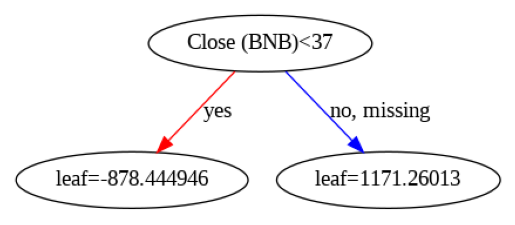

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

In [ ]:
from xgboost import plot_importance

plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

In [ ]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 1000)

LGBM.fit(X_train,Y_train)

y_pred = LGBM.predict(X_test)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score 21560.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error : 86.04940441397605


##Споредете ги резултатите добиени од двата модели со соодветни метрики